In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(before, after, title=""):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(before, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(after, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")

    plt.show()

In [2]:

IMAGE_PATH = "../data/processed/invoiceIMG/0002_page1.png"

image = cv2.imread(IMAGE_PATH)
assert image is not None, "Image not found"


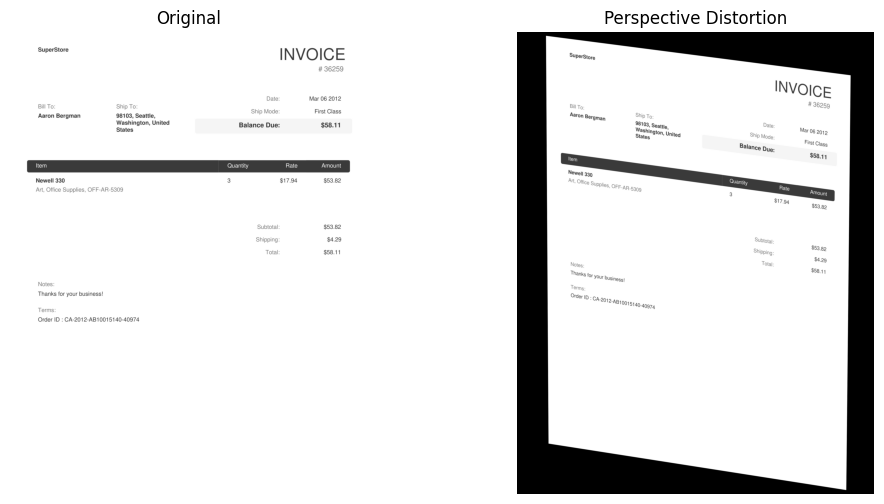

In [3]:
def perspective_distortion(img, max_shift=0.1):
    h, w = img.shape[:2]

    shift_w = int(w * max_shift)
    shift_h = int(h * max_shift)

    src = np.float32([
        [0, 0],
        [w, 0],
        [w, h],
        [0, h]
    ])

    dst = np.float32([
        [np.random.randint(0, shift_w), np.random.randint(0, shift_h)],
        [w - np.random.randint(0, shift_w), np.random.randint(0, shift_h)],
        [w - np.random.randint(0, shift_w), h - np.random.randint(0, shift_h)],
        [np.random.randint(0, shift_w), h - np.random.randint(0, shift_h)]
    ])

    M = cv2.getPerspectiveTransform(src, dst)
    return cv2.warpPerspective(img, M, (w, h))

aug = perspective_distortion(image, max_shift=0.12)
show(image, aug, "Perspective Distortion")


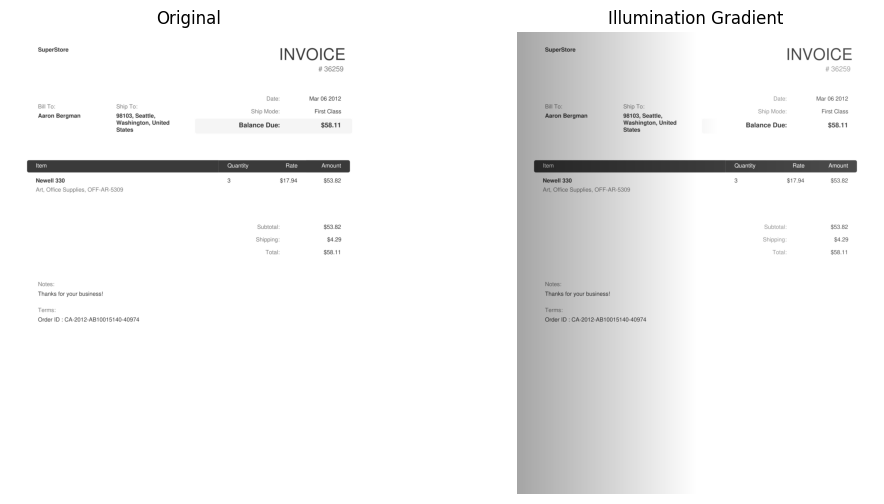

In [5]:
def illumination_gradient(img, strength=0.4):
    h, w = img.shape[:2]
    gradient = np.linspace(1 - strength, 1 + strength, w)
    mask = np.tile(gradient, (h, 1))

    out = img.astype(np.float32)
    for c in range(3):
        out[:, :, c] *= mask

    return np.clip(out, 0, 255).astype(np.uint8)

aug = illumination_gradient(image, strength=0.35)
show(image, aug, "Illumination Gradient")


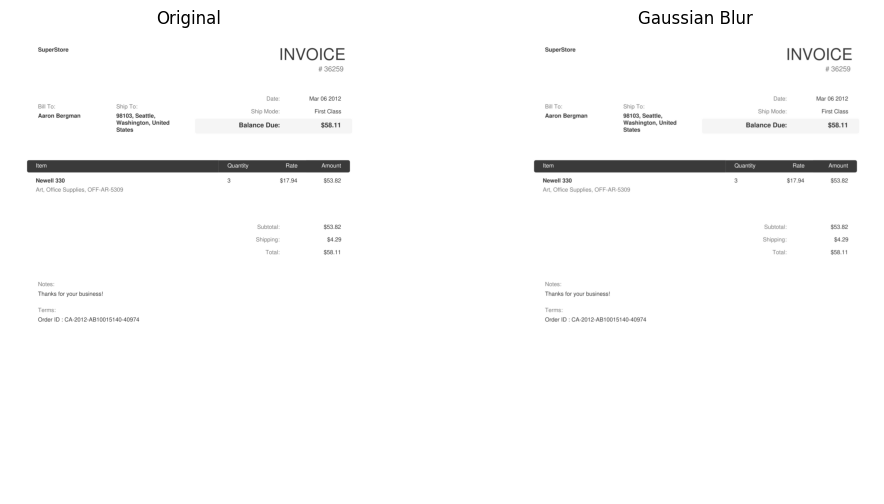

In [7]:
def gaussian_blur(img, k=5):
    return cv2.GaussianBlur(img, (k, k), 0)

aug = gaussian_blur(image, k=5)
show(image, aug, "Gaussian Blur")


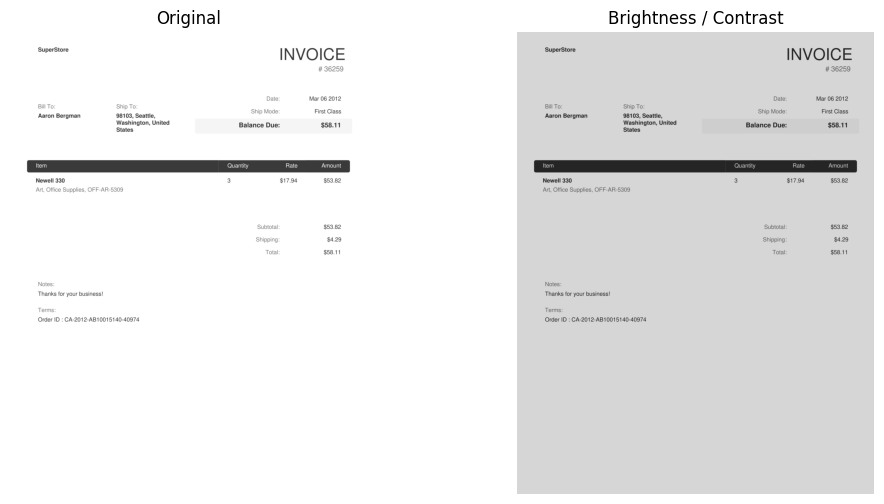

In [24]:
def brightness_contrast(img, alpha=1.1, beta=10):
    # alpha: contrast, beta: brightness
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

aug = brightness_contrast(image, alpha=0.9, beta=-15)
show(image, aug, "Brightness / Contrast")


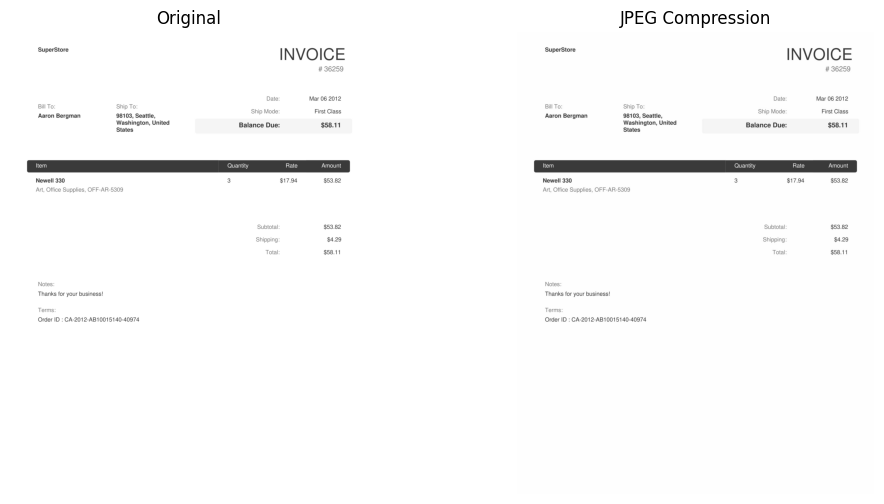

In [25]:
def jpeg_compress(img, quality=50):
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), quality]
    _, enc = cv2.imencode(".jpg", img, encode_param)
    return cv2.imdecode(enc, cv2.IMREAD_COLOR)

aug = jpeg_compress(image, quality=45)
show(image, aug, "JPEG Compression")


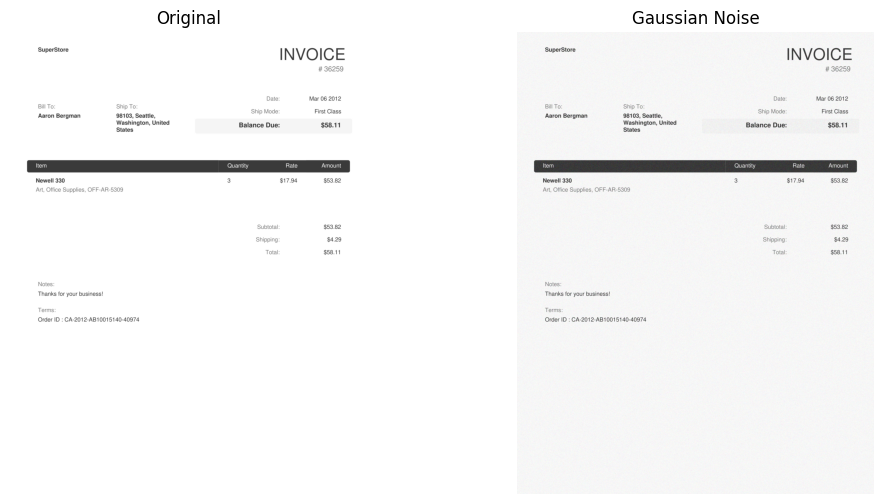

In [28]:
def gaussian_noise(img, sigma=8):
    noise = np.random.normal(0, sigma, img.shape).astype(np.float32)
    out = img.astype(np.float32) + noise
    return np.clip(out, 0, 255).astype(np.uint8)

aug = gaussian_noise(image, sigma=20)
show(image, aug, "Gaussian Noise")
